

# Structured Statistics for Business

This Jupyter Notebook provides structured statistical analysis relevant to business contexts. It includes data cleaning, exploratory data analysis (EDA), hypothesis testing, and visualization techniques to derive actionable insights.

## Insights
- **Descriptive Statistics**: Key trends and averages were calculated to summarize the dataset effectively.
- **Visualization**: Clear visualizations highlight patterns and anomalies in the data.
- **Statistical Testing**: Hypothesis tests validate significant relationships in the dataset, aiding in decision-making.

This project demonstrates the application of statistical methods to solve real-world business problems.

## Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "stores_sales_forecasting.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')


## Other

In [5]:
# Basic information about the dataset
print("Dataset Overview:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   flo

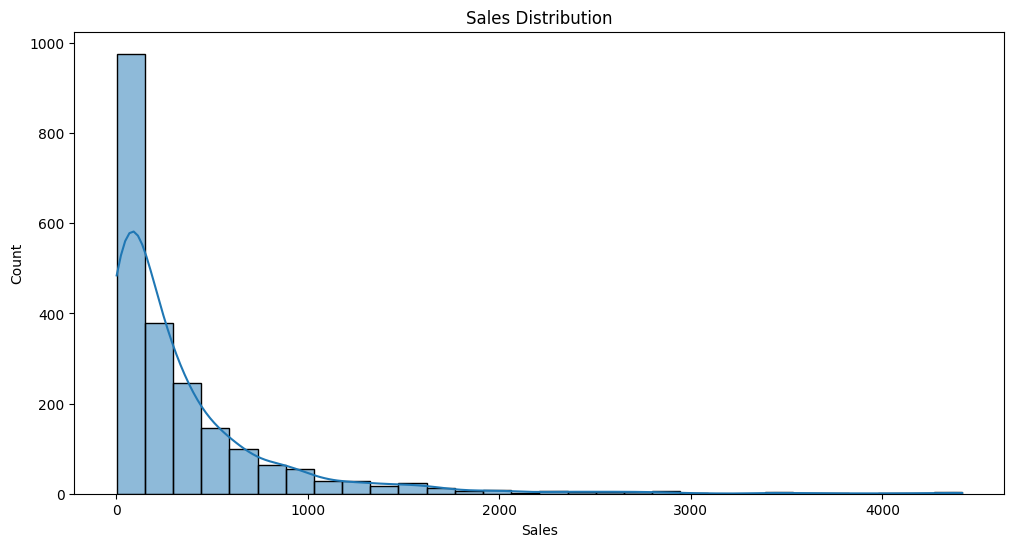

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Sales'], kde=True, bins=30)
plt.title("Sales Distribution")
plt.show()



In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])




Missing Values:
Series([], dtype: int64)


In [8]:
# Handling missing values

data['Sales'] = data['Sales'].fillna(data['Sales'].median())

data['Category'] = data['Category'].fillna(data['Category'].mode()[0])
missing_values = data.isnull().sum()
print("\nMissing Values After Cleaning:")
print(missing_values[missing_values > 0])



Missing Values After Cleaning:
Series([], dtype: int64)


In [9]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')


In [10]:
# Identify and remove outliers in 'Sales' using IQR method
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cleaned = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]

print("\nSales Data After Removing Outliers:")
print(data_cleaned['Sales'].describe())



Sales Data After Removing Outliers:
count    1957.000000
mean      235.160802
std       240.956958
min         1.892000
25%        41.960000
50%       150.980000
75%       349.965000
max      1013.832000
Name: Sales, dtype: float64


In [11]:

data_cleaned['Year'] = data_cleaned['Order Date'].dt.year
data_cleaned['Month'] = data_cleaned['Order Date'].dt.month
print("\nFirst 5 Rows with Year and Month Columns:")
print(data_cleaned[['Order Date', 'Year', 'Month']].head())



First 5 Rows with Year and Month Columns:
  Order Date  Year  Month
0 2016-11-08  2016     11
1 2016-11-08  2016     11
2 2015-10-11  2015     10
3 2014-06-09  2014      6
5 2017-07-16  2017      7


<ipython-input-11-84e17879aecb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Year'] = data_cleaned['Order Date'].dt.year
<ipython-input-11-84e17879aecb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Month'] = data_cleaned['Order Date'].dt.month


In [12]:
# Export cleaned data to a new CSV file
data_cleaned.to_csv("cleaned_data.csv", index=False)
print("\nCleaned data has been exported as 'cleaned_data.csv'")



Cleaned data has been exported as 'cleaned_data.csv'


Cleaned Sales Data:
       Sales
0   261.9600
1   731.9400
2   957.5775
3    48.8600
5    71.3720
8   124.2000
9   190.9200
10  532.3992
11  212.0580
12    6.1600


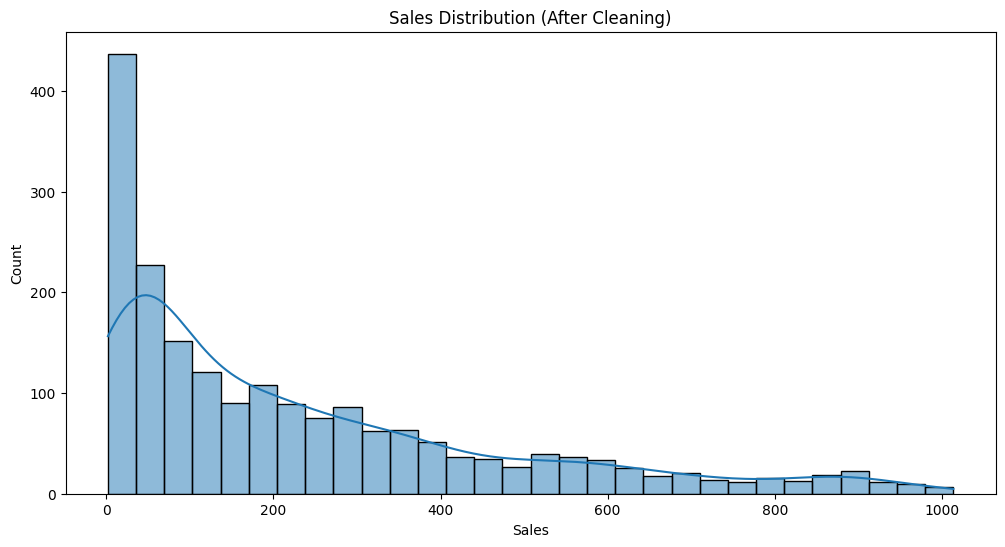

In [35]:

print("Cleaned Sales Data:")
print(data_cleaned[['Sales']].head(10))
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['Sales'], kde=True, bins=30)
plt.title("Sales Distribution (After Cleaning)")
plt.show()


Sales Trend Over Time (Monthly):
      Month  Total Sales
0   2014-01    6242.5250
1   2014-02    1839.6580
2   2014-03   14573.9560
3   2014-04    7944.8370
4   2014-05    6912.7870
5   2014-06   13206.1256
6   2014-07   10821.0510
7   2014-08    7320.3465
8   2014-09   23816.4808
9   2014-10   12304.2470
10  2014-11   21564.8727
11  2014-12   30645.9665
12  2015-01   11739.9416
13  2015-02    3134.3740
14  2015-03   12499.7830
15  2015-04   10475.6985
16  2015-05    9374.9505
17  2015-06    7714.1790
18  2015-07   13674.4200
19  2015-08    9638.5922
20  2015-09   26273.0230
21  2015-10   12026.6235
22  2015-11   30880.8325
23  2015-12   23085.8192
24  2016-01    7622.7430
25  2016-02    3925.5510
26  2016-03   12801.0920
27  2016-04   13212.0900
28  2016-05   15119.8350
29  2016-06   13070.5720
30  2016-07   13068.5190
31  2016-08   12483.2323
32  2016-09   27262.8809
33  2016-10   11872.5770
34  2016-11   31783.6288
35  2016-12   36678.7150
36  2017-01    5964.0320
37  2017-02    68

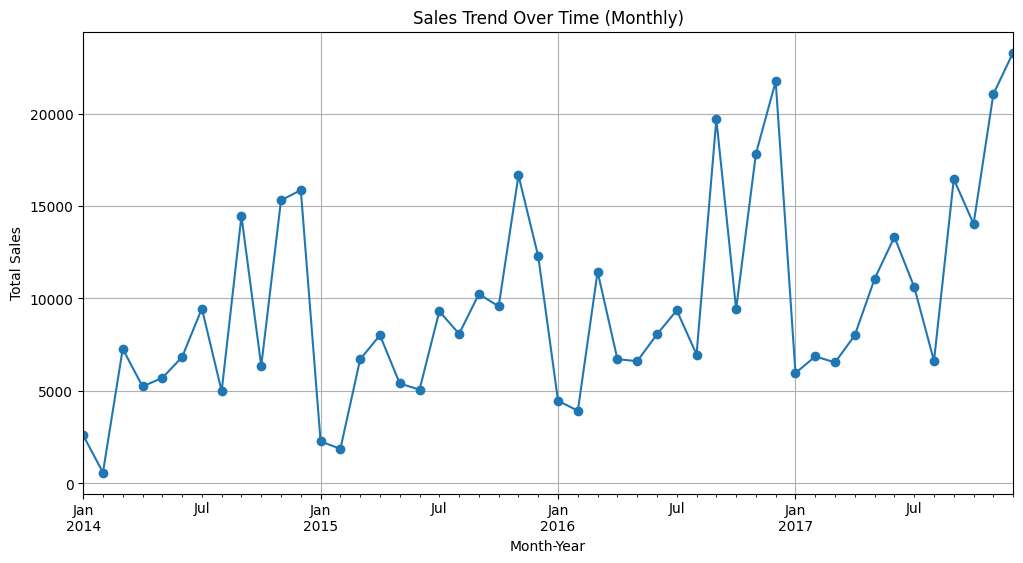

In [29]:

data['Order Date'] = pd.to_datetime(data['Order Date'])
time_sales = data.groupby(data['Order Date'].dt.to_period("M"))['Sales'].sum()

print("Sales Trend Over Time (Monthly):")
time_sales_table = pd.DataFrame({'Month': time_sales.index.astype(str), 'Total Sales': time_sales.values})
print(time_sales_table)
monthly_sales = data_cleaned.groupby(data_cleaned['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Sales Trend Over Time (Monthly)")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

In [14]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
            Row ID                     Order Date   Postal Code        Sales  \
count  2121.000000                           2121   2121.000000  2121.000000   
mean   5041.643564  2016-04-30 03:54:13.748231680  55726.556341   349.834887   
min       1.000000            2014-01-06 00:00:00   1040.000000     1.892000   
25%    2568.000000            2015-05-26 00:00:00  22801.000000    47.040000   
50%    5145.000000            2016-06-20 00:00:00  60505.000000   182.220000   
75%    7534.000000            2017-05-14 00:00:00  90032.000000   435.168000   
max    9991.000000            2017-12-30 00:00:00  99301.000000  4416.174000   
std    2885.740258                            NaN  32261.888225   503.179145   

          Quantity     Discount       Profit  
count  2121.000000  2121.000000  2121.000000  
mean      3.785007     0.173923     8.699327  
min       1.000000     0.000000 -1862.312400  
25%       2.000000     0.000000   -12.849000  
50%       3.000000     

In [15]:
missing_values = data.isnull().sum()
print(missing_values)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


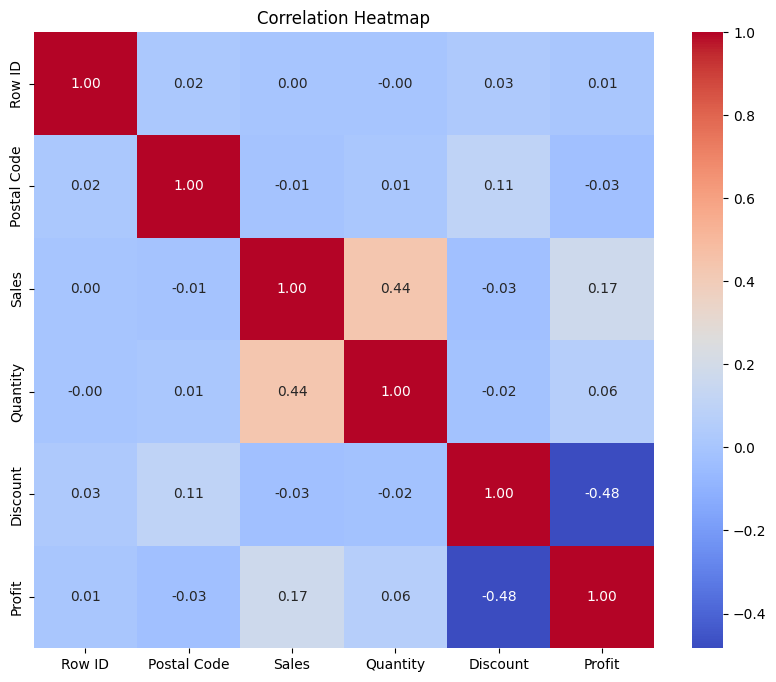

In [16]:
# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['number'])
corr_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


Total Sales per Region:
    Region  Total Sales
0     West  252612.7435
1     East  208291.2040
2  Central  163797.1638
3    South  117298.6840


<ipython-input-34-7a56a66e6727>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')


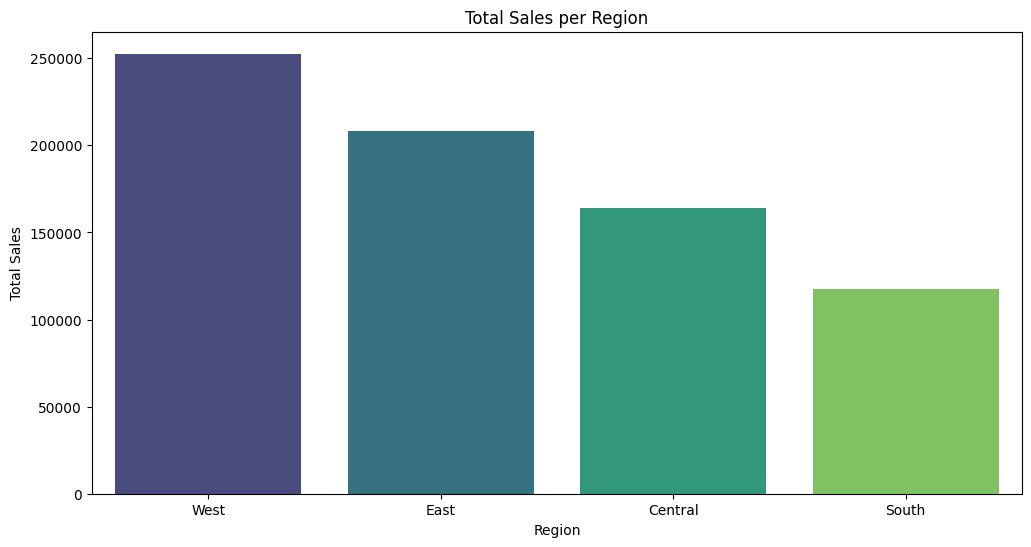

In [34]:
# Sales per Region
region_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("Total Sales per Region:")
region_sales_table = pd.DataFrame({'Region': region_sales.index, 'Total Sales': region_sales.values})
print(region_sales_table)

plt.figure(figsize=(12, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
plt.title("Total Sales per Region")
plt.ylabel("Total Sales")
plt.show()


Total Sales per Segment:
       Segment  Total Sales
0     Consumer  391049.3120
1    Corporate  229019.7858
2  Home Office  121930.6975


<ipython-input-33-60d8b697453d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_sales.index, y=segment_sales.values, palette='plasma')


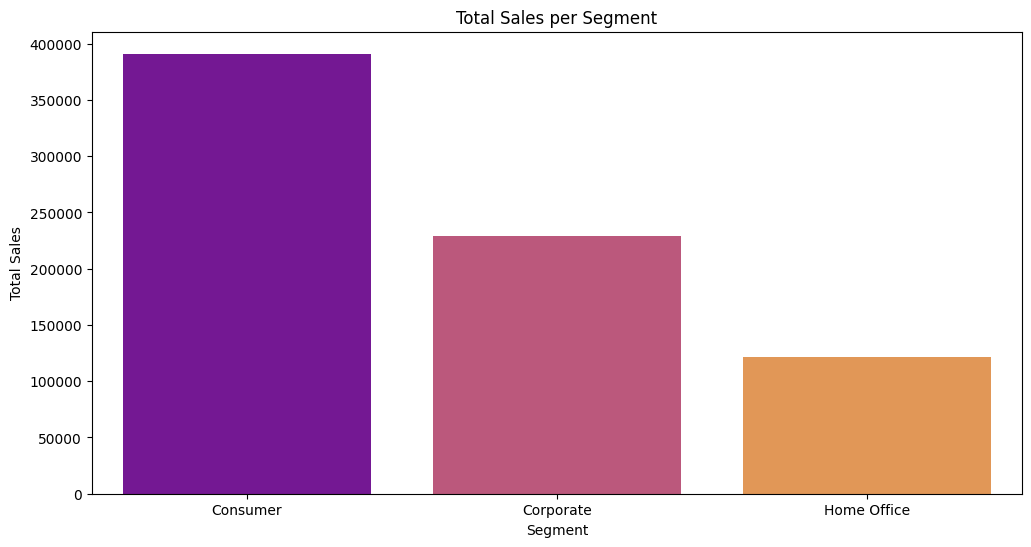

In [33]:
# Sales per Segment
segment_sales = data.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

print("Total Sales per Segment:")
segment_sales_table = pd.DataFrame({'Segment': segment_sales.index, 'Total Sales': segment_sales.values})
print(segment_sales_table)

plt.figure(figsize=(12, 6))
sns.barplot(x=segment_sales.index, y=segment_sales.values, palette='plasma')
plt.title("Total Sales per Segment")
plt.ylabel("Total Sales")
plt.show()


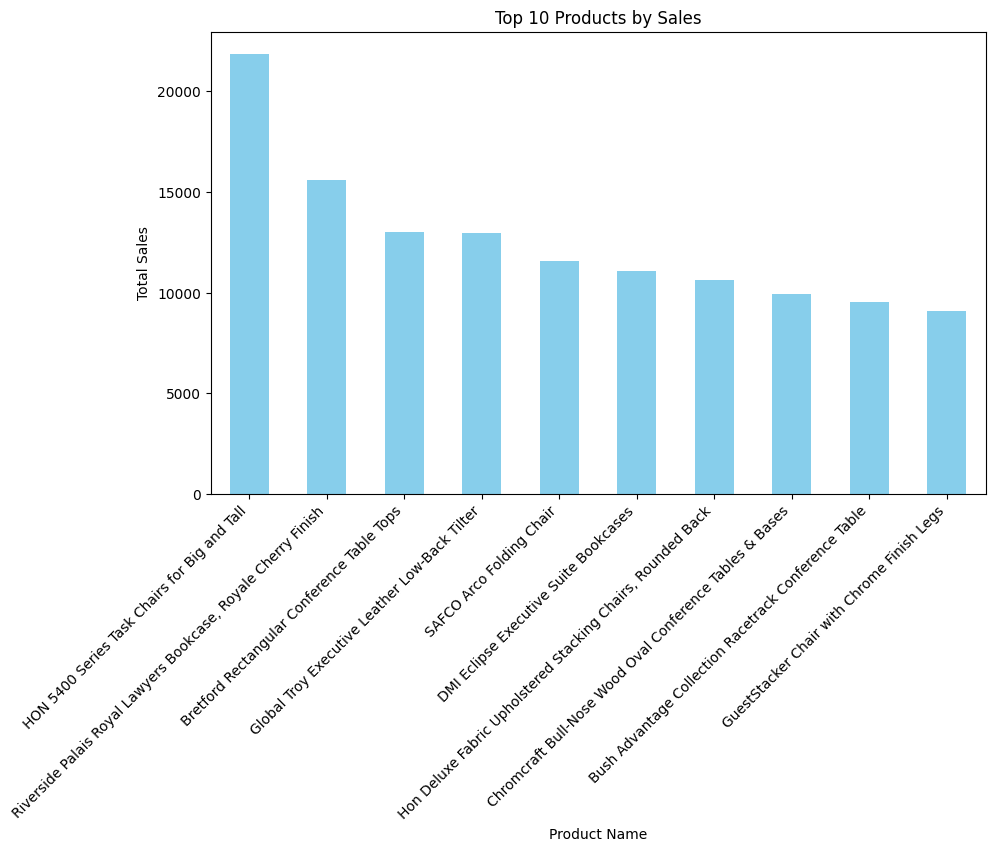

In [21]:
# Aggregate sales by product
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

top_products.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Products by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.show()


Total Sales per Customer Segment:
       Segment  Total Sales
0     Consumer  391049.3120
1    Corporate  229019.7858
2  Home Office  121930.6975


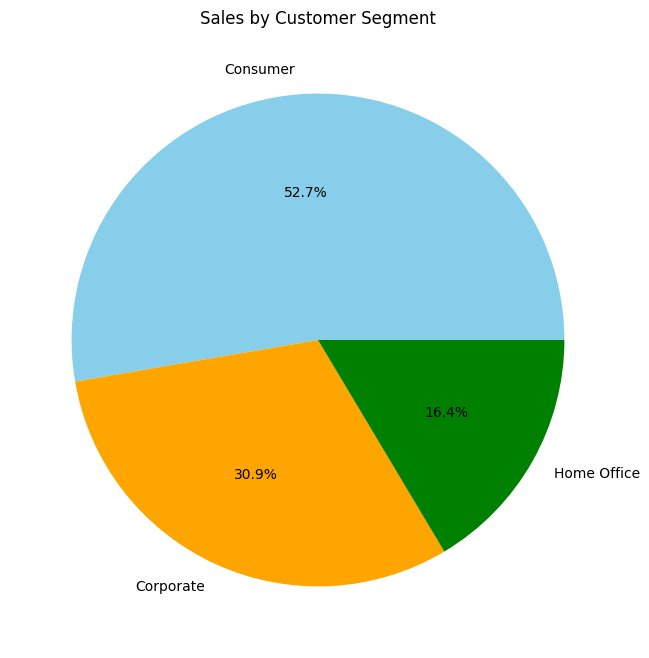

In [31]:
# Group the data by customer segment and calculate total sales for each segment
customer_segments = data.groupby('Segment')['Sales'].sum()
print("Total Sales per Customer Segment:")
customer_segments_table = pd.DataFrame({'Segment': customer_segments.index, 'Total Sales': customer_segments.values})
print(customer_segments_table)

customer_segments.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['skyblue', 'orange', 'green'])
plt.title("Sales by Customer Segment")
plt.ylabel("")
plt.show()


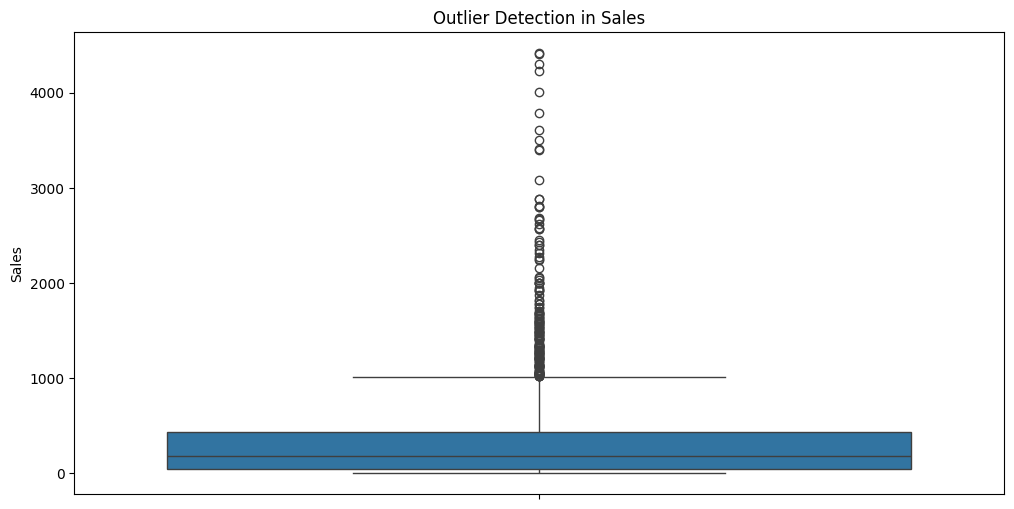

Outlier Transactions in Sales:
            Order ID     Sales
4     CA-2014-115812  1706.184
6     CA-2015-106320  1044.630
7     US-2015-150630  3083.430
35    CA-2016-114489  1951.840
37    CA-2014-139892  1740.060
...              ...       ...
2063  CA-2015-117086  4404.900
2069  CA-2016-146913  1403.920
2074  CA-2017-144491  1023.332
2092  CA-2015-164301  3393.680
2114  CA-2017-121559  1925.880

[164 rows x 2 columns]


In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, y='Sales')
plt.title("Outlier Detection in Sales")
plt.show()

Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Sales'] < lower_bound) | (data['Sales'] > upper_bound)]
print("Outlier Transactions in Sales:")
print(outliers[['Order ID', 'Sales']])

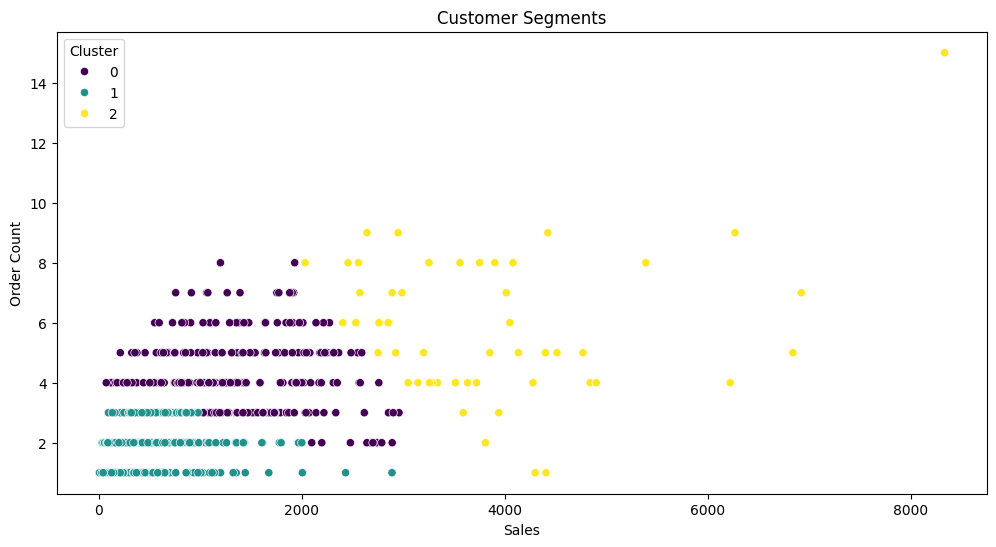

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

customer_data = data.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Order Count'})

scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_data, x='Sales', y='Order Count', hue='Cluster', palette='viridis')
plt.title("Customer Segments")
plt.show()
